In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Choix

On choisi un dataset de classification non-supervisé sur le thème de la classification de texte, pour cela nous avons choisi ce dataset :
https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset/data
Ce document comprend 2225 texte à catégoriser en 5 catégorie qui sont politique, sport, tech, amusement et business.

Ce dataset est très intéressant car il touche au domaine du NLP, la classification de texte en catégorie est très utilisé et utile par exemple : pour classifier des documents en entreprise, pour la collecte d'avis, l'analyse de sentiments, la catégorisation d'articles, et bien d'autres... 

In [3]:
df = pd.read_csv('df_file.csv')
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


Le dataset a une colonne label mais nous voulons être capable d'identifier des clusters sans celle-ci donc on la drop.

In [4]:
df.drop(['Label'], axis=1, inplace=True)

## EDA - Exploration du dataset

On compte le nombre d'entrée qui sont NaN

In [5]:
print(f"Number of nan values : \n {df.isna().sum()}")

Number of nan values : 
 Text    0
dtype: int64


On rajoute une colonne avec le nombre de charactere dans chaque text

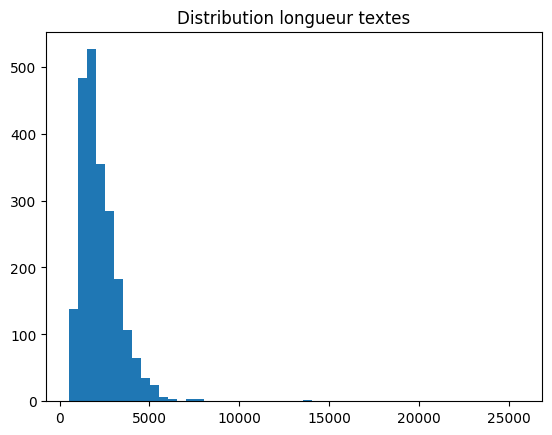

In [6]:
df['text_length'] = df['Text'].apply(len)

plt.hist(df['text_length'], bins=50)
plt.title('Distribution longueur textes')
plt.show()

## Preprocessing

In [32]:
import re
import nltk
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub("[^A-Za-z]+", " ", text) # on retire les caractères spéciaux
    splited = text.split()
    tokens = [w for w in splited if not w in stopwords.words("english")]
    text = " ".join(tokens)
    return text

In [35]:
df['text_cleaned'] = df['Text'].apply(lambda text: preprocess_text(text))
df = df[df['text_cleaned'] != '']

In [34]:
df.head()

,Text,text_length,text_cleaned
0,Budget to set scene for election\n \n Gordon B...,3147,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,3026,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,3167,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,3094,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,2614,kilroy names election seat target ex chat show...


## Transformation

On transforme les textes en vecteur avec TfidfVectorizer basé sur leur importance au sein des phrases.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df['text_cleaned']).toarray()

## Clustering

On utilise KMeans pour identifier des clusters de texte, on choisi un n_clusters de 5 car c'est le nombre de catégorie
dont nous avons décidé.

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster_label'] = kmeans.labels_
df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Text,text_length,text_cleaned,cluster_label
0,Budget to set scene for election\n \n Gordon B...,3147,budget set scene election gordon brown seek pu...,2
1,Army chiefs in regiments decision\n \n Militar...,3026,army chiefs regiments decision military chiefs...,2
2,Howard denies split over ID cards\n \n Michael...,3167,howard denies split id cards michael howard de...,2
3,Observers to monitor UK election\n \n Minister...,3094,observers monitor uk election ministers invite...,2
4,Kilroy names election seat target\n \n Ex-chat...,2614,kilroy names election seat target ex chat show...,2


On effectue une réduction de la dimensionalité avec PCA

In [44]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(X)

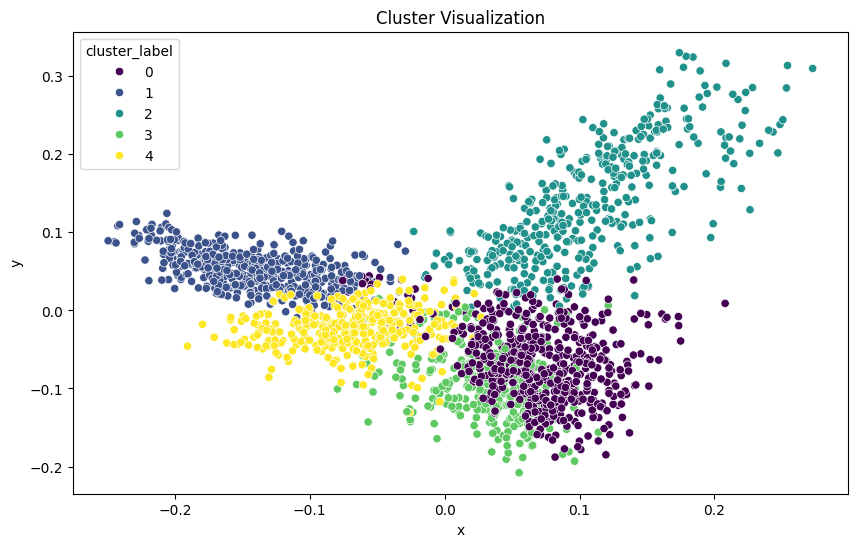

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

df['x'] = reduced_data[:, 0]
df['y'] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='cluster_label', data=df, palette='viridis', legend='full')
plt.title('Cluster Visualization')
plt.show()